## Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

## Gathering Data

In [2]:
target_data=pd.read_csv("Moon/Albedo_Map.csv",header=None)
Fe_data=pd.read_csv("Moon/LPFe_Map.csv",header=None)
Th_data=pd.read_csv("Moon/LPTh_Map.csv",header=None)
PK_data=pd.read_csv("Moon/LPK_Map.csv",header=None)
Ti_data=pd.read_csv("Moon/LPTi_Map.csv",header=None)

In [3]:
composition_names_list=['Fe Composition','Th Composition','PK Composition','Ti Composition']
dataframe_list=[Fe_data,PK_data,Th_data,Ti_data]

In [4]:
target_arr=target_data.values

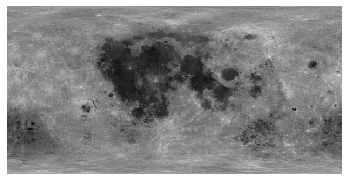

In [5]:
plt.imshow(target_arr,cmap='gray')   # Plotting moon albedo image original
plt.axis("off")
plt.show()

In [6]:
Path="Moon/"

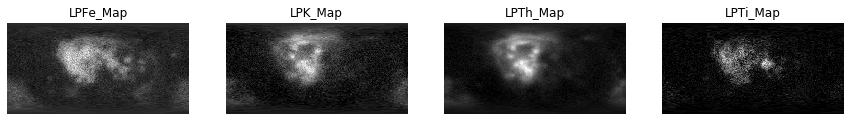

In [7]:
img_data=[]      # Plotting different configuration maps
plt.figure(figsize=(15,8))
for i in range(len(dataframe_list)):
    plt.subplot(1,len(dataframe_list),i+1)
    img_data.append(dataframe_list[i])
    plt.title(os.listdir(Path)[i+1][:-4])
    plt.imshow(dataframe_list[i],cmap="gray")
    plt.axis("off")
plt.show()

## Correlation Dataframe With Albedo Columnwise

In [8]:
column_names=["Target and Fe","Target and Pk","Target and Th","Target and Ti"]

In [9]:
corr_df=pd.DataFrame([],columns=column_names)

In [10]:
def correlation(data1,data2,col_name):
    value=pd.Series(data1.corrwith(data2),name=col_name)
    corr_df[col_name]=value
    return

In [11]:
for i in range(len(dataframe_list)):
    col_name=column_names[i]
    data2=dataframe_list[i]
    correlation(target_data,data2,col_name) 

In [12]:
corr_df

,Target and Fe,Target and Pk,Target and Th,Target and Ti
0,-0.743275,-0.717698,-0.759587,-0.374494
1,-0.782291,-0.732368,-0.803632,-0.441237
2,-0.767867,-0.730710,-0.790633,-0.405883
3,-0.779620,-0.738551,-0.786887,-0.434751
4,-0.773747,-0.726459,-0.790168,-0.497433
...,...,...,...,...
715,-0.706681,-0.698765,-0.784458,-0.119854
716,-0.749179,-0.691074,-0.796324,-0.018679
717,-0.787282,-0.745913,-0.825050,-0.086250
718,-0.763483,-0.727160,-0.805211,-0.075563


In [13]:
def build_dominant_Component(data):
    m=data.shape[0]
    max_value_col=[]
    for i in range(m):
        names_dict={}
        for col_name in column_names:
            value=data.loc[i,col_name]
            names_dict[value]=col_name[-2:]
        max_value_col.append(names_dict.get(max(names_dict.keys())))   
    return max_value_col

In [14]:
max_value_col=build_dominant_Component(corr_df)

In [15]:
corr_df['Dominant Elements']=max_value_col
corr_df

,Target and Fe,Target and Pk,Target and Th,Target and Ti,Dominant Elements
0,-0.743275,-0.717698,-0.759587,-0.374494,Ti
1,-0.782291,-0.732368,-0.803632,-0.441237,Ti
2,-0.767867,-0.730710,-0.790633,-0.405883,Ti
3,-0.779620,-0.738551,-0.786887,-0.434751,Ti
4,-0.773747,-0.726459,-0.790168,-0.497433,Ti
...,...,...,...,...,...
715,-0.706681,-0.698765,-0.784458,-0.119854,Ti
716,-0.749179,-0.691074,-0.796324,-0.018679,Ti
717,-0.787282,-0.745913,-0.825050,-0.086250,Ti
718,-0.763483,-0.727160,-0.805211,-0.075563,Ti


In [16]:
corr_df['Dominant Elements'].value_counts()

Pk    279
Ti    239
Th    187
Fe     15
Name: Dominant Elements, dtype: int64

- It is observed that albedo have very high correlation with the element composition

## Composition Dataframe Assuming That These Element Form The Albedo

In [17]:
combo=Fe_data+PK_data+Th_data+Ti_data
total=combo/target_data

In [18]:
def normalize_data(target,other_data_list):
    for i in range(len(other_data_list)):
        other_data_list[i]=other_data_list[i]/target
    return other_data_list

In [19]:
individual_composition=normalize_data(total,dataframe_list)

In [20]:
for i in range(len(individual_composition)):
    print(column_names[i])
    print(individual_composition[i].head())

Target and Fe
        0         1         2         3         4         5         6    \
0  0.001690  0.001693  0.001692  0.001685  0.001686  0.001693  0.001690   
1  0.001726  0.001733  0.001704  0.001699  0.001687  0.001689  0.001709   
2  0.002022  0.002027  0.002042  0.002028  0.001999  0.002002  0.002007   
3  0.002038  0.002036  0.002078  0.002034  0.002042  0.002035  0.002031   
4  0.002162  0.002120  0.002059  0.002088  0.002116  0.002069  0.002086   

        7         8         9    ...       710       711       712       713  \
0  0.001680  0.001669  0.001662  ...  0.001682  0.001675  0.001682  0.001699   
1  0.001710  0.001696  0.001692  ...  0.001784  0.001764  0.001741  0.001761   
2  0.002024  0.002048  0.002024  ...  0.002066  0.002083  0.002072  0.002070   
3  0.002068  0.002023  0.002026  ...  0.001990  0.001971  0.002013  0.001988   
4  0.002095  0.002079  0.002043  ...  0.002005  0.002085  0.002095  0.002083   

        714       715       716       717       718   

In [21]:
combine_composition=pd.DataFrame([])
combine_composition=individual_composition[0]
for i in range(1,len(individual_composition)):
    combine_composition+=individual_composition[i]

In [22]:
combine_composition

,0,1,2,3,4,5,6,7,8,9,...,710,711,712,713,714,715,716,717,718,719
0,0.331936,0.332611,0.332240,0.331028,0.331094,0.332614,0.331964,0.329994,0.327853,0.326532,...,0.330389,0.329089,0.330334,0.333719,0.334709,0.334640,0.332491,0.334664,0.332983,0.331635
1,0.338990,0.340417,0.334623,0.333716,0.331404,0.331733,0.335648,0.335849,0.333166,0.332413,...,0.350386,0.346509,0.341890,0.345887,0.345619,0.344203,0.345772,0.341238,0.342606,0.338984
2,0.324930,0.325832,0.328177,0.325871,0.321231,0.321791,0.322595,0.325254,0.329132,0.325335,...,0.329577,0.332204,0.330471,0.330105,0.331836,0.335386,0.335075,0.333190,0.327436,0.330122
3,0.327572,0.327171,0.333880,0.326805,0.328176,0.327048,0.326413,0.332305,0.325137,0.325540,...,0.317473,0.314289,0.321126,0.317036,0.320553,0.312072,0.311713,0.315656,0.317066,0.319407
4,0.347444,0.340715,0.330832,0.335570,0.340129,0.332496,0.335220,0.336632,0.334052,0.328328,...,0.319792,0.332530,0.334123,0.332214,0.343655,0.333832,0.352028,0.340800,0.348094,0.349389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.349260,0.346207,0.342223,0.348059,0.351282,0.351806,0.346547,0.342462,0.350412,0.338387,...,0.343868,0.346470,0.351124,0.350038,0.352102,0.351563,0.357074,0.357971,0.352557,0.350174
356,0.372876,0.372291,0.375865,0.372710,0.366126,0.368370,0.373526,0.376578,0.369563,0.366004,...,0.349653,0.354181,0.354170,0.359534,0.361730,0.359800,0.362682,0.364402,0.377847,0.378339
357,0.364782,0.366013,0.366931,0.367956,0.371537,0.374301,0.373912,0.374175,0.370267,0.376187,...,0.363301,0.361500,0.359253,0.358727,0.359291,0.357086,0.354218,0.354450,0.354684,0.361495
358,0.346737,0.346492,0.346062,0.346397,0.347103,0.348263,0.347726,0.348052,0.347308,0.346435,...,0.351721,0.351528,0.351530,0.351087,0.350346,0.348528,0.347109,0.346246,0.346165,0.346139


In [23]:
X_train=combine_composition.values[:,:360]
X_test=combine_composition.values[:,360:] 
Y_train=target_arr[:,:360]
Y_test=target_arr[:,360:]

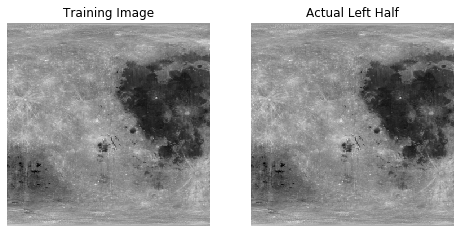

In [24]:
training_list=[X_train,Y_train]
named_list=["Training Image","Actual Left Half"]
plt.figure(figsize=(8,6))
for i in range(1,3):
    plt.subplot(1,2,i)
    plt.title(str(named_list[i-1]))
    plt.axis("off")
    plt.imshow(training_list[i-1],cmap='gray')
plt.show()

## Model Building

In [25]:
lr=LinearRegression()

In [26]:
lr.fit(X_train,Y_train)
weights_learned=lr.coef_[0]
intercepts=lr.intercept_
pred=lr.predict(X_test)

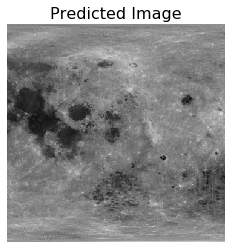

In [27]:
plt.title("Predicted Image",fontsize=16)
plt.imshow(pred,cmap="gray")
plt.axis("off")
plt.show()

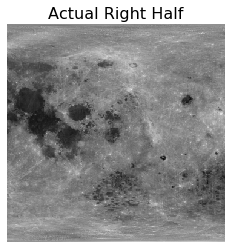

In [28]:
plt.title("Actual Right Half",fontsize=16)
plt.imshow(Y_test,cmap="gray")
plt.axis("off")
plt.show()

## Residual Plot

In [29]:
residuals=pred-Y_train

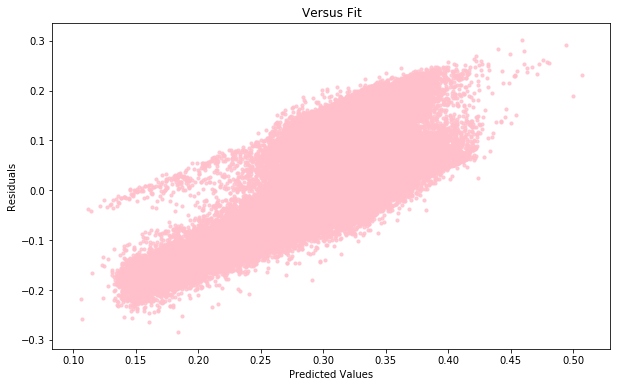

In [30]:
plt.figure(figsize=(10,6))
plt.title("Versus Fit")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.scatter(pred,residuals,s=10,alpha=0.8,c="pink")
plt.show()

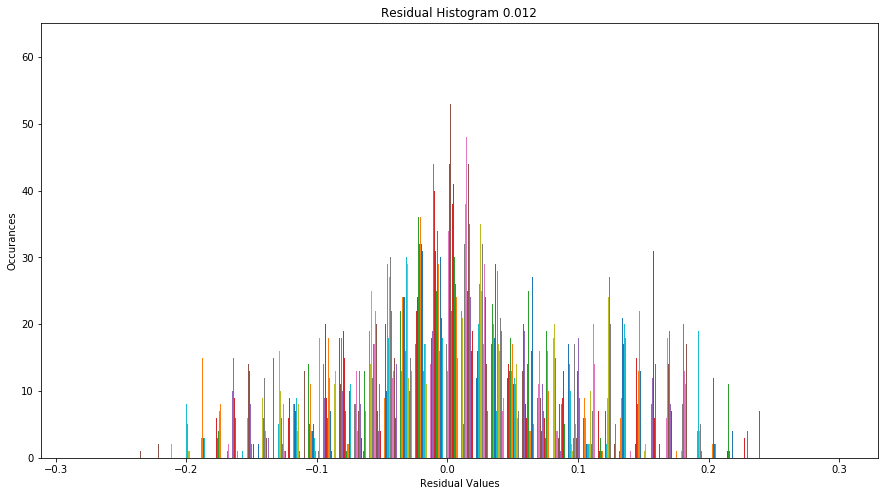

In [31]:
plt.figure(figsize=(15,8))
plt.hist(residuals,bins=50)
plt.title(f"Residual Histogram {round(residuals.mean(),3)}")
plt.xlabel("Residual Values")
plt.ylabel("Occurances")
plt.show()

- We can generate new images from the iron, albedo image and other element to train using afining technique, but here we have used linear regression model as Neural Network regression requires a handsome amount of dataset.